In [1]:
# LDA sobre Iris en scikit-learn: notebook paso a paso

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# 1) Cargar dataset como DataFrame

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

df = pd.DataFrame(X, columns=feature_names)
df["target"] = y
df["target_name"] = df["target"].map({i: n for i, n in enumerate(target_names)})

# Mostrar primeras filas (en Jupyter podes usar display(df.head()))
print("Primeras filas del dataset Iris:")
print(df.head())

Primeras filas del dataset Iris:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa  


In [4]:
# 2) Train / Test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [5]:
# 3) Entrenar LDA como clasificador

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [6]:
# 4) Evaluación básica

y_pred = lda.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"\nAccuracy en test: {acc:.4f}\n")
print("Reporte de clasificación:\n")
print(classification_report(y_test, y_pred, target_names=target_names))


Accuracy en test: 0.9778

Reporte de clasificación:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [7]:
# 5) Validación cruzada estratificada (5 folds) en todo el dataset

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(LinearDiscriminantAnalysis(), X, y, cv=cv)
print("CV 5-fold scores:", cv_scores)
print("CV mean:", cv_scores.mean(), "±", cv_scores.std())


CV 5-fold scores: [1.         1.         0.9        1.         0.96666667]
CV mean: 0.9733333333333333 ± 0.038873012632301994


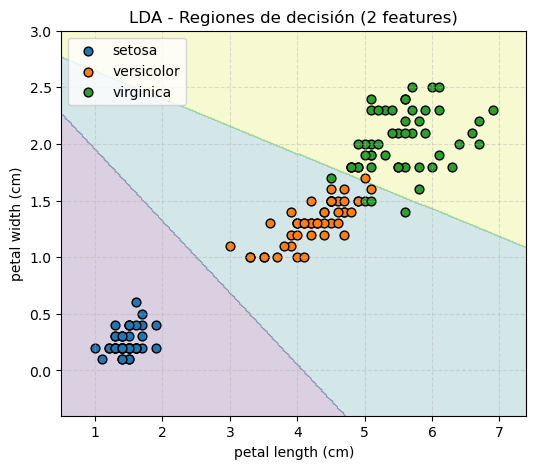

In [10]:
# --- Regiones de decisión 2D para LDA (con 2 features) ---

import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

# Elegimos dos features: petal length y petal width (suelen separar muy bien)
feat_idx = (2, 3)  # columnas 2 y 3
X2 = X[:, feat_idx]
feat_names = [feature_names[i] for i in feat_idx]

# Entrenar LDA solo con estas 2 features para graficar regiones
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y, test_size=0.3, random_state=42, stratify=y
)
lda_2d = LinearDiscriminantAnalysis()  # opcional: solver='lsqr', shrinkage='auto'
lda_2d.fit(X2_train, y2_train)

# Malla para las regiones de decisión
x_min, x_max = X2[:, 0].min() - 0.5, X2[:, 0].max() + 0.5
y_min, y_max = X2[:, 1].min() - 0.5, X2[:, 1].max() + 0.5
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)
Z = lda_2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(6, 5))
# Fondo con regiones (para LDA deberían apreciarse fronteras lineales)
plt.contourf(xx, yy, Z, alpha=0.2)

# Puntos reales
for i, name in enumerate(target_names):
    mask = y == i
    plt.scatter(X2[mask, 0], X2[mask, 1], label=name, edgecolor="k", s=40)

plt.xlabel(feat_names[0])
plt.ylabel(feat_names[1])
plt.title("LDA - Regiones de decisión (2 features)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()

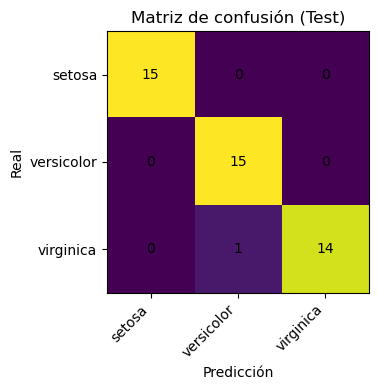

In [9]:
# 7) Matriz de confusión

plt.figure(figsize=(4, 4))
plt.imshow(cm)
plt.title("Matriz de confusión (Test)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.xticks(ticks=[0,1,2], labels=target_names, rotation=45, ha="right")
plt.yticks(ticks=[0,1,2], labels=target_names)
for (i, j), v in np.ndenumerate(cm):
    plt.text(j, i, str(v), ha='center', va='center')
plt.tight_layout()
plt.show()